In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:
def plot_case(axis, recommender, initialization, quantity, linestyle):
    means.loc[recommender, initialization][quantity].plot(label=recommender, ax=axis, linestyle=linestyle, legend=False)
    axis.fill_between(np.linspace(0, 0.2, 11),
                     means.loc[recommender, initialization][quantity] + std.loc[recommender, initialization][quantity],
                     means.loc[recommender, initialization][quantity] - std.loc[recommender, initialization][quantity],
                     alpha=0.2)

In [110]:
df = pd.read_csv("processed_evaluations/stationary_evaluations.csv")
df = df.drop(columns="Unnamed: 0")
df

,grid,dex,exploration,with_ids,epsilon,iot-nodes,ratio,evaluate,evaluate_var,ma_all_testing,entropy_testing
0,uniform,work-commute,random,1,0,True,0.40,61.216451,279.794219,39.090124,1.317833
1,uniform,work-commute,random,1,0,True,0.55,43.765740,149.562684,33.041501,1.483247
2,uniform,work-commute,random,0,0,True,0.60,67.513138,291.199008,49.844035,1.250993
3,uniform,work-commute,random,0,0,True,0.25,54.808368,225.366426,56.049781,1.256637
4,uniform,work-commute,random,0,0,True,0.55,36.555215,142.502412,19.441301,1.349448
...,...,...,...,...,...,...,...,...,...,...,...
247,random,one-way,random,1,0,True,0.95,7.216494,7.084250,10.364866,2.189872
248,random,one-way,random,0,0,True,0.95,11.057359,5.009958,13.367891,2.089733
249,random,work-commute,random,1,0,True,1.00,163.019698,4405.765048,40.350111,1.862416
250,random,one-way,random,1,0,True,1.00,17.959689,22.001120,21.619033,1.989829


<AxesSubplot:>

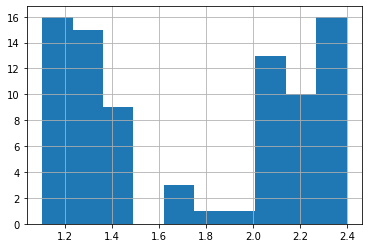

In [44]:
df["entropy_testing"].hist()

In [111]:
means = df.groupby(["grid", "dex", "exploration", "iot-nodes", "with_ids", "ratio"]).mean()
std = df.groupby(["grid", "dex", "exploration", "iot-nodes", "with_ids", "ratio"]).std()

In [112]:
means.loc["random", "one-way"]

epsilon   evaluate  evaluate_var  \
exploration iot-nodes with_ids ratio                                     
random      True      0        0.00       0.0  13.545772      9.679692   
                               0.05       0.0  15.528891     11.448119   
                               0.10       0.0  11.178110      6.155958   
                               0.15       0.0  10.889710      6.650762   
                               0.20       0.0  11.575497      6.300581   
                               0.25       0.0  13.782135      7.250902   
                               0.30       0.0  11.220340      6.630475   
                               0.35       0.0  11.439658      6.783147   
                               0.40       0.0  11.811797     12.852228   
                               0.45       0.0  10.711016      8.762198   
                               0.50       0.0   8.447365      3.140848   
                               0.55       0.0  10.837242      5.841152   
                               0.60       0.0  10.623387      3.750838   
                               0.65       0.0  10.013226      5.396375   
                               0.70       0.0   9.202174      4.540855   
                               0.75       0.0   9.606323     12.373405   
                               0.80       0.0   9.427274      4.367441   
                               0.85       0.0  12.960893      5.627403   
                               0.90       0.0  10.318603      7.453948   
                               0.95       0.0  11.057359      5.009958   
                               1.00       0.0  22.629479     20.284541   
                      1        0.00       0.0  14.739443     16.964172   
                               0.05       0.0  11.732697      5.142564   
                               0.10       0.0  13.090517      4.966441   
                               0.15       0.0   8.646161      3.441563   
                               0.20       0.0  13.685469     10.192631   
                               0.25       0.0   9.129242      3.764474   
                               0.30       0.0   8.512104      2.854341   
                               0.35       0.0  10.587311      3.003827   
                               0.40       0.0   8.414609      3.398945   
                               0.45       0.0   8.904837      2.466826   
                               0.50       0.0   7.831455      3.905242   
                               0.55       0.0  11.791258      3.583702   
                               0.60       0.0   8.276456      4.127634   
                               0.65       0.0   7.802263      2.856245   
                               0.70       0.0   8.627597      5.038976   
                               0.75       0.0   7.520856      1.942493   
                               0.80       0.0   7.413489      5.760865   
                               0.85       0.0   9.164577      2.948702   
                               0.90       0.0   7.397301      4.804900   
                               0.95       0.0   7.216494      7.084250   
                               1.00       0.0  17.959689     22.001120   

                                      ma_all_testing  entropy_testing  
exploration iot-nodes with_ids ratio                                   
random      True      0        0.00         5.586959         2.019759  
                               0.05         5.614297         1.991360  
                               0.10         5.321229         2.017553  
                               0.15         5.318478         2.021253  
                               0.20         5.324215         2.046892  
                               0.25         5.329395         2.065706  
                               0.30         5.479089         2.065362  
                               0.35         6.129668         2.084771  
                               0.40         6.198577         

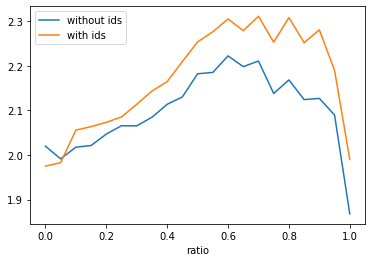

In [154]:
means.loc["random", "one-way", "random", True, 0]["entropy_testing"].plot(label="without ids")
means.loc["random", "one-way", "random", True, 1]["entropy_testing"].plot(label="with ids")
# means.loc["uniform", "random", "random", True]["entropy_testing"].plot(label="uniform")
# means.loc["uniform", "random", "random", True]["entropy_testing"].plot(label="uniform")
plt.legend()

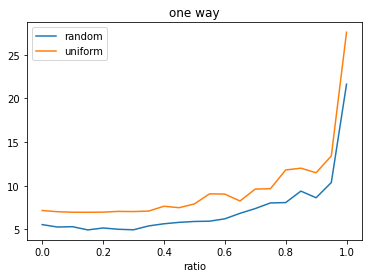

In [145]:
means.loc["random", "one-way", "random", True, 1]["ma_all_testing"].plot(label="random")
means.loc["uniform", "one-way", "random", True, 1]["ma_all_testing"].plot(label="uniform")
plt.title("one way")
plt.legend()

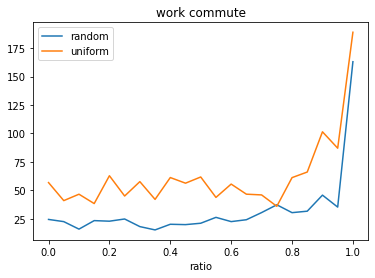

In [169]:
means.loc["random", "work-commute", "random", True, 1]["evaluate"].plot(label="random")
means.loc["uniform", "work-commute", "random", True, 1]["evaluate"].plot(label="uniform")
plt.title("work commute")
plt.legend()

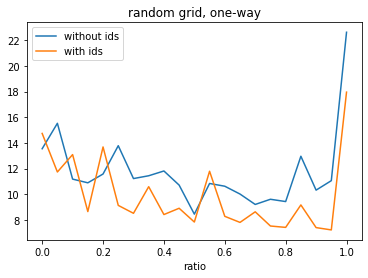

In [170]:
means.loc["random", "one-way", "random", True, 0]["evaluate"].plot(label="without ids")
means.loc["random", "one-way", "random", True, 1]["evaluate"].plot(label="with ids")
plt.title("random grid, one-way")
plt.legend()

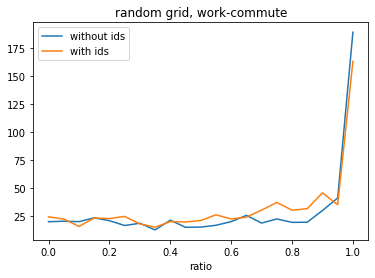

In [171]:
means.loc["random", "work-commute", "random", True, 0]["evaluate"].plot(label="without ids")
means.loc["random", "work-commute", "random", True, 1]["evaluate"].plot(label="with ids")
plt.title("random grid, work-commute")
plt.legend()

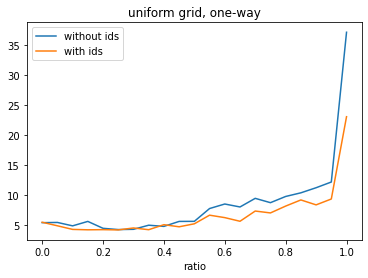

In [173]:
means.loc["uniform", "one-way", "random", True, 0]["evaluate"].plot(label="without ids")
means.loc["uniform", "one-way", "random", True, 1]["evaluate"].plot(label="with ids")
plt.title("uniform grid, one-way")
plt.legend()

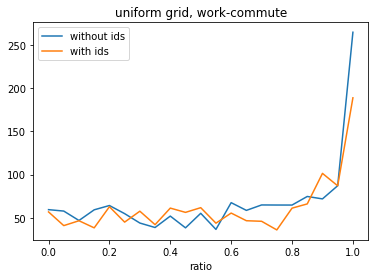

In [172]:
means.loc["uniform", "work-commute", "random", True, 0]["evaluate"].plot(label="without ids")
means.loc["uniform", "work-commute", "random", True, 1]["evaluate"].plot(label="with ids")
plt.title("uniform grid, work-commute")
plt.legend()

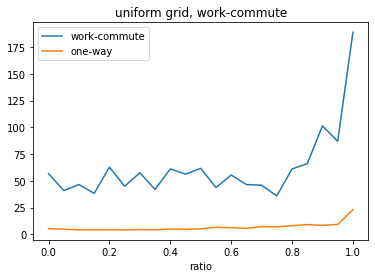

In [179]:
means.loc["uniform", "work-commute", "random", True, 1]["evaluate"].plot(label="work-commute")
means.loc["uniform", "one-way", "random", True, 1]["evaluate"].plot(label="one-way")
plt.title("uniform grid, work-commute")
plt.legend()

## Non-stationary

In [180]:
data = pd.read_csv("processed_evaluations/non_stationary_random_random.csv")
data = data.drop(columns="Unnamed: 0")
data

,grid,dex,exploration,with_ids,epsilon,iot-nodes,ratio,time,moving_average
0,random,work-commute,random,0,0,True,0.0,0,17.416432
1,random,work-commute,random,0,0,True,0.0,1,17.416432
2,random,work-commute,random,0,0,True,0.0,2,17.426526
3,random,work-commute,random,0,0,True,0.0,3,17.459149
4,random,work-commute,random,0,0,True,0.0,4,17.498291
...,...,...,...,...,...,...,...,...,...
88106,random,work-commute,random,0,0,True,1.0,11178,10.469372
88107,random,work-commute,random,0,0,True,1.0,11179,10.457922
88108,random,work-commute,random,0,0,True,1.0,11180,10.446472
88109,random,work-commute,random,0,0,True,1.0,11181,10.435023


<AxesSubplot:>

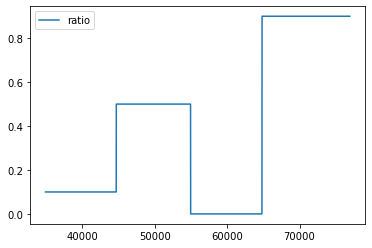

In [181]:
data.loc[data["dex"] == "one-way"].plot(y="ratio")

In [182]:
data.set_index('time', inplace=True)

In [183]:
data

,grid,dex,exploration,with_ids,epsilon,iot-nodes,ratio,moving_average
time,,,,,,,,
0,random,work-commute,random,0,0,True,0.0,17.416432
1,random,work-commute,random,0,0,True,0.0,17.416432
2,random,work-commute,random,0,0,True,0.0,17.426526
3,random,work-commute,random,0,0,True,0.0,17.459149
4,random,work-commute,random,0,0,True,0.0,17.498291
...,...,...,...,...,...,...,...,...
11178,random,work-commute,random,0,0,True,1.0,10.469372
11179,random,work-commute,random,0,0,True,1.0,10.457922
11180,random,work-commute,random,0,0,True,1.0,10.446472


ratio
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
0.1    AxesSubplot(0.125,0.125;0.775x0.755)
0.5    AxesSubplot(0.125,0.125;0.775x0.755)
0.9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

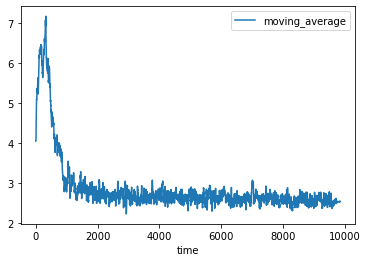

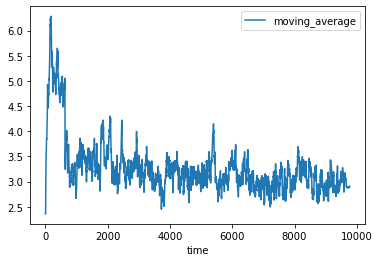

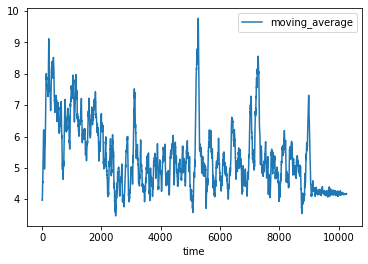

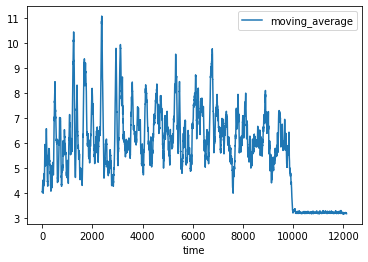

In [184]:
data.loc[data["dex"]=="one-way"].groupby("ratio").plot(y="moving_average", legend=True)

In [185]:
rolling = data.loc[data["dex"]=="one-way"].groupby("ratio").rolling(10).mean()

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_42251/832424466.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dex', 'exploration', 'grid'], dtype='object')
  rolling = data.loc[data["dex"]=="one-way"].groupby("ratio").rolling(10).mean()


<AxesSubplot:xlabel='ratio,time'>

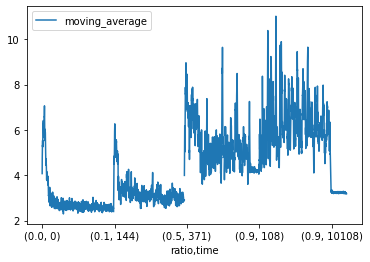

In [186]:
rolling.plot(y="moving_average", legend=True)

In [187]:
averages = data.pivot(columns=["dex", "ratio"], values="moving_average")

In [188]:
averages

dex   work-commute                                   one-way            \
ratio          0.0        0.5        0.1       0.9       0.1       0.5   
time                                                                     
0        17.416432  11.157983  16.222104  5.793468  2.356455  3.966046   
1        17.416432  11.157983  16.222104  5.793468  2.356455  3.966046   
2        17.426526  11.175751  16.238422  5.832779  2.356455  3.966046   
3        17.459149  11.227932  16.271925  5.914354  2.356455  3.966046   
4        17.498291  11.274888  16.314272  6.008381  2.356455  3.966046   
...            ...        ...        ...       ...       ...       ...   
12121          NaN        NaN        NaN       NaN       NaN       NaN   
12122          NaN        NaN        NaN       NaN       NaN       NaN   
12123          NaN        NaN        NaN       NaN       NaN       NaN   
12124          NaN        NaN        NaN       NaN       NaN       NaN   
12125          NaN        NaN        NaN       NaN       NaN       NaN   

dex                       work-commute  
ratio       0.0       0.9          1.0  
time                                    
0      4.042704  4.055477     3.478978  
1      4.042704  4.055477     3.478978  
2      4.042704  4.055477     3.513527  
3      4.042704  4.055477     3.592821  
4      4.042704  4.055477     3.685358  
...         ...       ...          ...  
12121       NaN  3.186601          NaN  
12122       NaN  3.186749          NaN  
12123       NaN  3.186897          NaN  
12124       NaN  3.187045          NaN  
12125       NaN  3.187193          NaN  

[12126 rows x 9 columns]

<AxesSubplot:xlabel='time'>

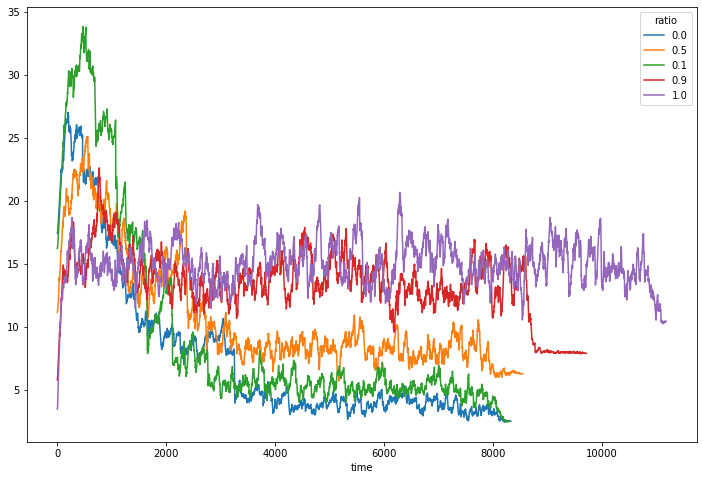

In [193]:
averages["work-commute"].plot(figsize=(12,8))

<AxesSubplot:xlabel='time'>

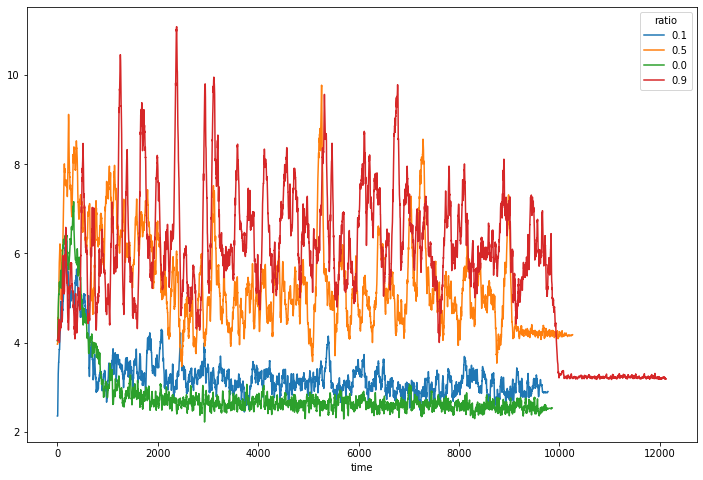

In [194]:
averages["one-way"].plot(figsize=(12,8))

In [191]:
rolling_averages = averages.rolling(1000).mean()

<AxesSubplot:xlabel='time'>

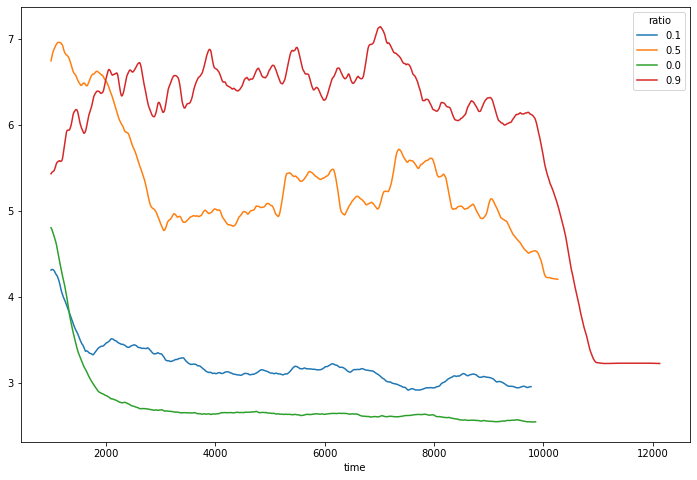

In [195]:
rolling_averages["one-way"].plot(figsize=(12,8))

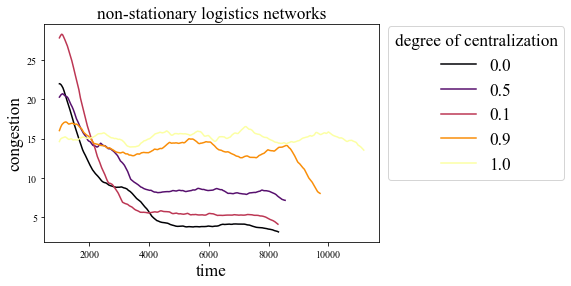

In [248]:
cmap = cm.get_cmap('inferno')
rolling_averages["work-commute"].plot(figsize=(6,4), cmap=cmap)
plt.title("non-stationary logistics networks", **{"fontname": "Times New Roman", "fontsize": "xx-large"})
plt.legend(title="degree of centralization", prop={"family": "Times New Roman", "size": "xx-large"}, bbox_to_anchor=(1, 1.03))
plt.ylabel("congestion", **{"fontname": "Times New Roman", "fontsize": "xx-large"})
plt.xlabel("time", **{"fontname": "Times New Roman", "fontsize": "xx-large"})
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.rcParams['font.family'] = 'Times New Roman'
# plt.tight_layout()
plt.savefig("images/congestion_in_non_stationary_logistics_networks.png", dpi=300, bbox_inches="tight")

In [243]:
ls

README.md
Untitled.ipynb
__pycache__/
batch_evaluate_on_euler.py
batch_plot_on_euler.py
batch_process_data_on_euler.py
batch_run_on_euler.py
batch_train_centralized_on_euler.py
cache/
cluster_plots/
congestion_in_non_stationary_logistics_networks.png
dqn_agent.py
dqn_grid.py
dqn_grid_evaluate_online.py
dqn_grid_online.py
dqn_grid_results.ipynb
dqn_grid_test.py
dqn_grid_train_centralized.py
dqn_results/
dqn_test.py
environment.py
experiments/
graph.gpkg
graph.graphml
graph_shapefile/
grids/
images/
networkx.ipynb
papers/
plot_evaluations.ipynb
plotting.py
pre_process_data.py
pretrained_models/
process_evaluations_data.py
process_non_stationary_evaluations.py
processed_evaluations/
system_performance_timeseries.png
tasks.md
test.mp4
test_data/
test_plots/
trip_lengths_timeseries.png
unify_pickle_rows.py


In [238]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri